# Question 3
For this exercise we are going to use the data which led to this publication:
* Wuensch, K. L., Castellow, W. A., & Moore, C. H.  (1991).  Effects of defendant attractiveness and type of crime on juridic judgment.  Journal of Social Behavior and Personality, 6, 713-724.

This exercise utilizes the data set *JURY91.SAV*, which can be downloaded from this site: http://edhd.bgsu.edu/amm/datasets.html

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
from scipy import stats
import seaborn as sb
import statsmodels.api as sm
import numbers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA


In [106]:
data = pd.read_excel('Jury_data.xlsx', header=0)

## Take a sample of 270

In [107]:
df = data.sample(n=270, random_state=123)
df.dtypes

crime         int64
pa_manip      int64
sex_def       int64
sex_subj      int64
sentence    float64
serious     float64
exciting      int64
calm          int64
independ      int64
sincere       int64
warm          int64
phy_attr      int64
kind          int64
intellig    float64
strong      float64
sophist     float64
happy       float64
sociable      int64
dtype: object

In [108]:
# Save sample as csv
#df.to_csv('q3_jury_sample.csv')

## A. Common Factor Analysis
* Conduct a common (principle) factor analysis on the 12 metric variables (exciting, calm, independent, sincere, warm, phy_attr, kind, intellig, strong, sophist, happy, and sociable) and a varimax rotation. 

    * Ignore the variables (Serious, sentences, Sex of defendant, and sex of subjects). 

* Retain all factors with an initial eigenvalue of 1 or more.

* Look at the rotated loadings and decide what you would call these factors. 

* Comment on MSA and the Bartlett’s test.

In [109]:
# Dropping missing values rows becuase missing data must be dropped for factor analysis
df.dropna(inplace=True)
df.head()

,crime,pa_manip,sex_def,sex_subj,sentence,serious,exciting,calm,independ,sincere,warm,phy_attr,kind,intellig,strong,sophist,happy,sociable
20,1,2,2,2,4.0,8.0,8,8,8,9,8,9,9,9.0,9.0,9.0,5.0,9
11,1,2,2,1,4.0,5.0,4,1,3,9,2,9,6,8.0,4.0,8.0,7.0,9
94,1,1,1,2,2.0,4.0,4,9,9,1,1,1,9,7.0,7.0,5.0,3.0,6
117,1,1,1,1,5.0,5.0,4,6,4,2,2,2,1,2.0,3.0,3.0,4.0,6
187,2,2,1,1,4.0,4.0,5,4,7,1,3,8,2,7.0,5.0,5.0,4.0,5


In [110]:
# Select the 12 metric variables defined in the directions
metric_vars = ['exciting', 'calm', 'independ', 'sincere', 'warm', 'phy_attr', 'kind', 'intellig','strong',
              'sophist', 'happy', 'sociable']

In [111]:
# The data must be scaled for factor analysis
df[[*metric_vars]] = StandardScaler().fit_transform(df[[*metric_vars]])
# Ignore the variables serious, sentences, sex of defendent, and sex of subjects
df = df[[*metric_vars]]
df.head()

/Users/req89250/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/req89250/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,exciting,calm,independ,sincere,warm,phy_attr,kind,intellig,strong,sophist,happy,sociable
20,1.779391,0.737640,0.935079,2.266622,2.154314,1.175837,2.503226,1.389598,1.647462,1.637992,0.184660,1.511182
11,-0.407431,-2.457645,-1.084016,2.266622,-0.801779,1.175837,1.035882,0.879885,-0.781252,1.127575,1.263894,1.511182
94,-0.407431,1.194110,1.338898,-1.130082,-1.294462,-1.323113,2.503226,0.370172,0.675977,-0.403676,-0.894574,0.126371
117,-0.407431,-0.175298,-0.680197,-0.705494,-0.801779,-1.010744,-1.409692,-2.178393,-1.266994,-1.424510,-0.354957,0.126371
187,0.139275,-1.088237,0.531260,-1.130082,-0.309097,0.863468,-0.920577,0.370172,-0.295509,-0.403676,-0.354957,-0.335233


### Step 1: Correlation matrix 
Factorability must first be assessed by visualizing a correlation matrix

In [112]:
df.corr()

,exciting,calm,independ,sincere,warm,phy_attr,kind,intellig,strong,sophist,happy,sociable
exciting,1.000000,0.144922,0.228204,0.005584,0.076846,0.493357,0.038740,0.340480,0.417785,0.355429,0.378100,0.436266
calm,0.144922,1.000000,0.344744,0.082667,0.068952,0.101486,0.117919,0.258633,0.319147,0.329660,0.193461,0.252089
independ,0.228204,0.344744,1.000000,0.265277,0.186905,0.221857,0.136094,0.155526,0.295716,0.197999,0.150461,0.080996
sincere,0.005584,0.082667,0.265277,1.000000,0.510509,0.145730,0.373896,0.097400,0.196944,0.101674,0.108497,0.019104
warm,0.076846,0.068952,0.186905,0.510509,1.000000,0.145181,0.541008,0.142110,0.238061,0.066459,0.254198,0.041655
phy_attr,0.493357,0.101486,0.221857,0.145730,0.145181,1.000000,0.161096,0.335404,0.409201,0.404940,0.274449,0.246151
kind,0.038740,0.117919,0.136094,0.373896,0.541008,0.161096,1.000000,0.154028,0.298885,0.121995,0.245260,0.045939
intellig,0.340480,0.258633,0.155526,0.097400,0.142110,0.335404,0.154028,1.000000,0.514193,0.544130,0.432590,0.335225
strong,0.417785,0.319147,0.295716,0.196944,0.238061,0.409201,0.298885,0.514193,1.000000,0.616020,0.380468,0.357050
sophist,0.355429,0.329660,0.197999,0.101674,0.066459,0.404940,0.121995,0.544130,0.616020,1.000000,0.408619,0.446086


### Step 2: Bartlett's test and MSA

In [331]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(910.4829425170884, 4.302070663928493e-149)

In [332]:
# Calculate MSA
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8087020175705015

In [333]:
kmo_all

,KMO
exciting,0.777249
calm,0.783113
independ,0.743437
sincere,0.721972
warm,0.693177
phy_attr,0.829211
kind,0.742397
intellig,0.891819
strong,0.859690
sophist,0.822508


### Step 3: Factor Analysis without Rotation

In [334]:
# First look at the factor analysis without rotation
fa_plain = FactorAnalyzer()
fa_plain.analyze(df, rotation=None)

In [335]:
fa_plain.loadings

,Factor1,Factor2,Factor3
exciting,0.568141,-0.254531,-0.216029
calm,0.435241,-0.072020,0.598840
independ,0.374724,0.120643,0.259623
sincere,0.301230,0.540711,0.047621
warm,0.391629,0.728163,-0.112318
phy_attr,0.541241,-0.082354,-0.192331
kind,0.371361,0.526182,-0.037351
intellig,0.632296,-0.152645,-0.036876
strong,0.754202,-0.043053,0.030719
sophist,0.710881,-0.254291,0.040093


In [336]:
ev, v = fa_plain.get_eigenvalues()
v

,Common_Factor_Eigenvalues
0,3.412986
1,1.352735
2,0.553639
3,0.314428
4,0.228286
5,0.053390
6,0.007036
7,-0.029462
8,-0.056156
9,-0.102415


### Step 4: Conduct Common Factor Analysis with Varimax Rotation

In [337]:
# Next look at the factor analysis with rotation
fa = FactorAnalyzer()
fa.analyze(df, rotation='varimax')

In [338]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,2.731326,1.632218,0.955816
Proportion Var,0.227611,0.136018,0.079651
Cumulative Var,0.227611,0.363629,0.443280


In [339]:
fa.corr

,exciting,calm,independ,sincere,warm,phy_attr,kind,intellig,strong,sophist,happy,sociable
exciting,1.000000,0.144922,0.228204,0.005584,0.076846,0.493357,0.038740,0.340480,0.417785,0.355429,0.378100,0.436266
calm,0.144922,1.000000,0.344744,0.082667,0.068952,0.101486,0.117919,0.258633,0.319147,0.329660,0.193461,0.252089
independ,0.228204,0.344744,1.000000,0.265277,0.186905,0.221857,0.136094,0.155526,0.295716,0.197999,0.150461,0.080996
sincere,0.005584,0.082667,0.265277,1.000000,0.510509,0.145730,0.373896,0.097400,0.196944,0.101674,0.108497,0.019104
warm,0.076846,0.068952,0.186905,0.510509,1.000000,0.145181,0.541008,0.142110,0.238061,0.066459,0.254198,0.041655
phy_attr,0.493357,0.101486,0.221857,0.145730,0.145181,1.000000,0.161096,0.335404,0.409201,0.404940,0.274449,0.246151
kind,0.038740,0.117919,0.136094,0.373896,0.541008,0.161096,1.000000,0.154028,0.298885,0.121995,0.245260,0.045939
intellig,0.340480,0.258633,0.155526,0.097400,0.142110,0.335404,0.154028,1.000000,0.514193,0.544130,0.432590,0.335225
strong,0.417785,0.319147,0.295716,0.196944,0.238061,0.409201,0.298885,0.514193,1.000000,0.616020,0.380468,0.357050
sophist,0.355429,0.329660,0.197999,0.101674,0.066459,0.404940,0.121995,0.544130,0.616020,1.000000,0.408619,0.446086


In [340]:
fa.get_communalities()

,Communalities
exciting,0.434238
calm,0.553231
independ,0.222377
sincere,0.385375
warm,0.696210
phy_attr,0.336715
kind,0.416171
intellig,0.424458
strong,0.571618
sophist,0.571623


In [341]:
ev, v = fa.get_eigenvalues()
v

,Common_Factor_Eigenvalues
0,3.412986
1,1.352735
2,0.553639
3,0.314428
4,0.228286
5,0.053390
6,0.007036
7,-0.029462
8,-0.056156
9,-0.102415


### Step 4: Obtain all factors with eigenvalues of 1 or more

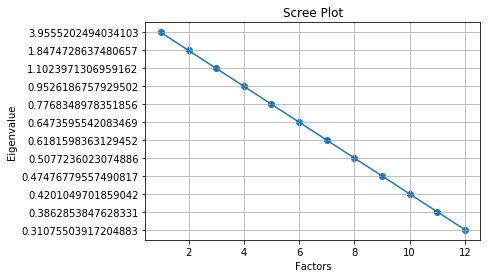

In [342]:
# First, let's create a scree plot of the values
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [343]:
# We can see above that there are only 2 factors with eigenvalues greater than 1, so we set n_factors = 2
fa = FactorAnalyzer()
fa.analyze(df, rotation=None, n_factors=2)
fa.loadings

,Factor1,Factor2
exciting,0.562097,-0.248556
calm,0.385706,-0.052339
independ,0.365127,0.118102
sincere,0.303229,0.544175
warm,0.390377,0.711031
phy_attr,0.538802,-0.082362
kind,0.374487,0.530578
intellig,0.636711,-0.156254
strong,0.759328,-0.044888
sophist,0.715869,-0.258910


In [344]:
# We can see above that there are only 2 factors with eigenvalues greater than 1, so we set n_factors = 2
fa2 = FactorAnalyzer()
fa2.analyze(df, rotation='varimax', n_factors=2)

In [345]:
fa2.loadings

,Factor1,Factor2
exciting,0.614599,-0.001319
calm,0.374155,0.107317
independ,0.286721,0.255063
sincere,0.058582,0.620195
warm,0.071208,0.808015
phy_attr,0.526388,0.141447
kind,0.129286,0.636427
intellig,0.645756,0.113206
strong,0.713184,0.264504
sophist,0.759534,0.051088


In [346]:
fact1_loads = pd.DataFrame(columns=['variable', 'loading'])
fact2_loads = pd.DataFrame(columns=['variable', 'loading'])
for i in range(len(fa2.loadings)):
    if fa2.loadings['Factor1'].iloc[i] > 0.28:
        fact1_loads = fact1_loads.append({'variable':df.columns[i], 'loading':fa2.loadings['Factor1'].iloc[i]},
                                        ignore_index=True)
    if fa2.loadings['Factor2'].iloc[i] > 0.28:
        fact2_loads = fact2_loads.append({'variable':df.columns[i], 'loading':fa2.loadings['Factor2'].iloc[i]},
                                        ignore_index=True)


In [347]:
fact1_loads.sort_values(by='loading', ascending=False)

,variable,loading
6,sophist,0.759534
5,strong,0.713184
4,intellig,0.645756
0,exciting,0.614599
8,sociable,0.584416
7,happy,0.550735
3,phy_attr,0.526388
1,calm,0.374155
2,independ,0.286721


In [348]:
fact2_loads.sort_values(by='loading', ascending=False)

,variable,loading
1,warm,0.808015
2,kind,0.636427
0,sincere,0.620195


In [349]:
fa2.get_factor_variance()

,Factor1,Factor2
SS Loadings,3.049609,1.666675
Proportion Var,0.254134,0.138890
Cumulative Var,0.254134,0.393024


In [350]:
ev, v = fa2.get_eigenvalues()
v

,Common_Factor_Eigenvalues
0,3.380933
1,1.335352
2,0.342040
3,0.276383
4,0.160628
5,0.043014
6,0.004027
7,-0.045842
8,-0.089483
9,-0.131607


In [351]:
new_cols = df.columns.drop('calm').drop('independ')
fa = FactorAnalyzer()
fa.analyze(df[[*new_cols]], rotation='varimax', n_factors=2)
fa.loadings

,Factor1,Factor2
exciting,0.625143,-0.009665
sincere,0.055029,0.590177
warm,0.075990,0.830244
phy_attr,0.540426,0.134345
kind,0.131985,0.649372
intellig,0.648543,0.119720
strong,0.701676,0.256807
sophist,0.750728,0.053804
happy,0.560707,0.211957
sociable,0.584053,-0.027149


In [352]:
fact1_loads = pd.DataFrame(columns=['variable', 'loading'])
fact2_loads = pd.DataFrame(columns=['variable', 'loading'])
for i in range(len(fa.loadings)):
    if fa.loadings['Factor1'].iloc[i] > 0.40:
        fact1_loads = fact1_loads.append({'variable':df.columns[i], 'loading':fa.loadings['Factor1'].iloc[i]},
                                        ignore_index=True)
    if fa.loadings['Factor2'].iloc[i] > 0.40:
        fact2_loads = fact2_loads.append({'variable':df.columns[i], 'loading':fa.loadings['Factor2'].iloc[i]},
                                        ignore_index=True)

In [353]:
fact1_loads.sort_values(by='loading', ascending=False)

,variable,loading
4,intellig,0.750728
3,kind,0.701676
2,phy_attr,0.648543
0,exciting,0.625143
6,sophist,0.584053
5,strong,0.560707
1,sincere,0.540426


In [354]:
fact2_loads.sort_values(by='loading', ascending=False)

,variable,loading
1,independ,0.830244
2,warm,0.649372
0,calm,0.590177


### Step 5: Name the factors
Look at the rotated loadings and decide what you would call these factors.

In [355]:
fa.loadings

,Factor1,Factor2
exciting,0.625143,-0.009665
sincere,0.055029,0.590177
warm,0.075990,0.830244
phy_attr,0.540426,0.134345
kind,0.131985,0.649372
intellig,0.648543,0.119720
strong,0.701676,0.256807
sophist,0.750728,0.053804
happy,0.560707,0.211957
sociable,0.584053,-0.027149


In [356]:
fa.corr

,exciting,sincere,warm,phy_attr,kind,intellig,strong,sophist,happy,sociable
exciting,1.000000,0.005584,0.076846,0.493357,0.038740,0.340480,0.417785,0.355429,0.378100,0.436266
sincere,0.005584,1.000000,0.510509,0.145730,0.373896,0.097400,0.196944,0.101674,0.108497,0.019104
warm,0.076846,0.510509,1.000000,0.145181,0.541008,0.142110,0.238061,0.066459,0.254198,0.041655
phy_attr,0.493357,0.145730,0.145181,1.000000,0.161096,0.335404,0.409201,0.404940,0.274449,0.246151
kind,0.038740,0.373896,0.541008,0.161096,1.000000,0.154028,0.298885,0.121995,0.245260,0.045939
intellig,0.340480,0.097400,0.142110,0.335404,0.154028,1.000000,0.514193,0.544130,0.432590,0.335225
strong,0.417785,0.196944,0.238061,0.409201,0.298885,0.514193,1.000000,0.616020,0.380468,0.357050
sophist,0.355429,0.101674,0.066459,0.404940,0.121995,0.544130,0.616020,1.000000,0.408619,0.446086
happy,0.378100,0.108497,0.254198,0.274449,0.245260,0.432590,0.380468,0.408619,1.000000,0.398127
sociable,0.436266,0.019104,0.041655,0.246151,0.045939,0.335225,0.357050,0.446086,0.398127,1.000000


In [357]:
fa.get_communalities()

,Communalities
exciting,0.390898
sincere,0.351337
warm,0.695080
phy_attr,0.310108
kind,0.439104
intellig,0.434941
strong,0.558299
sophist,0.566487
happy,0.359318
sociable,0.341855


### Tests

In [358]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fa.loadings)
chi_square_value, p_value
# Calculate MSA
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fa.loadings)

In [359]:
kmo_model

0.5000000000000001

In [360]:
p_value

0.0001674665622280975

## B. Principal Component Analysis
In PCA, we are interested to find the directions (components) that maximize the variance in our dataset
* Use a principle component on the same 12 variables and a varimax rotation. 
* Obtain a scree plot. 
* Retain all factors with an initial eigenvalue of 1 or more. 
* Look at the rotated loadings and decide what you would call these factors. 
* Comment on MSA and the Bartlett’s test.

### Step 1: PCA without rotation

In [174]:
initial_pca = PCA()
initial_principalComponents = initial_pca.fit_transform(df)
ipca_df = pd.DataFrame(data = initial_principalComponents)
ipca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-4.825671,2.200162,0.375441,0.278075,-0.009507,0.886984,0.990729,0.383606,-0.777951,0.418541,0.299835,0.725319
1,-1.125121,0.404863,2.876555,-0.043094,0.349825,2.020757,-0.862492,-0.293109,1.783970,1.599783,1.237296,0.373649
2,-0.087310,0.284534,-1.833419,-1.173905,0.176080,-1.613855,1.291808,1.658279,-0.289500,1.544725,1.254967,-0.003833
3,3.041781,-0.818393,-0.211907,0.122248,-1.564983,0.319142,0.275590,-0.085321,0.398551,-0.646206,-0.097935,-0.358261
4,0.612586,-1.028310,0.328913,1.297862,0.437156,-0.547622,-0.592015,0.124573,-0.170967,0.592981,-0.745437,-0.241661


In [175]:
print(initial_pca.explained_variance_)
print(initial_pca.explained_variance_ratio_)

[3.97061765 1.85452429 1.10660475 0.95625462 0.77979992 0.64983039
 0.62051923 0.50966148 0.47657989 0.42170842 0.38775976 0.31194113]
[0.32962669 0.15395607 0.09186643 0.07938489 0.06473624 0.05394663
 0.05151332 0.0423103  0.03956398 0.03500875 0.03219045 0.02589625]


Compute PCA by hand

In [183]:
# Covariance matrix
cov_mat = np.cov(df.T)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.00381679 0.14547493 0.22907467 0.00560554 0.07713977 0.49524025
  0.03888823 0.34177912 0.41937977 0.35678557 0.37954273 0.43793154]
 [0.14547493 1.00381679 0.34606    0.08298287 0.06921506 0.10187338
  0.11836918 0.25962034 0.32036552 0.33091797 0.19419936 0.2530508 ]
 [0.22907467 0.34606    1.00381679 0.2662897  0.18761878 0.22270362
  0.13661377 0.15611981 0.29684436 0.1987546  0.1510357  0.08130475]
 [0.00560554 0.08298287 0.2662897  1.00381679 0.51245736 0.14628618
  0.37532358 0.09777222 0.19769536 0.10206197 0.10891154 0.01917648]
 [0.07713977 0.06921506 0.18761878 0.51245736 1.00381679 0.14573522
  0.5430732  0.14265219 0.2389695  0.0667131  0.25516829 0.04181399]
 [0.49524025 0.10187338 0.22270362 0.14628618 0.14573522 1.00381679
  0.1617109  0.33668402 0.41076286 0.406486   0.27549609 0.24709065]
 [0.03888823 0.11836918 0.13661377 0.37532358 0.5430732  0.1617109
  1.00381679 0.15461542 0.30002615 0.12246034 0.24619615 0.04611483]
 [0.34177912 0.2596203

After the covariance matrix is generated, eigendecomposition is performed on the covariance matrix. Eigenvectors and eigenvalues are found as a result of the eigendceomposition. Each of those eigenvectors is associated with an eigenvalue, which tell us about the “length” or “magnitude” of the eigenvectors. Each eigenvector has a corresponding eigenvalue, and the sum of the eigenvalues represents all of the variance within the entire dataset.

In [184]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
eig_val_cov[1]

1.8545242868921445

In [185]:
eig_vec_cov

array([[-0.31176644, -0.23352254,  0.166271  , -0.43964058,  0.32558049,
        -0.34740112,  0.10878941,  0.08917389,  0.32431848,  0.26607376,
         0.44902908,  0.057069  ],
       [-0.22879558, -0.03896995, -0.64896492,  0.30997746,  0.14225835,
         0.02405189,  0.12141255,  0.33560191,  0.05392543,  0.17041244,
         0.10608729, -0.48734381],
       [-0.21727584,  0.14924747, -0.60550593, -0.3950512 ,  0.1555902 ,
        -0.03717788,  0.15791727, -0.33938836, -0.12775406, -0.29741508,
        -0.1241261 ,  0.34916554],
       [-0.16523089,  0.51309215, -0.04700743, -0.11695801, -0.01803131,
         0.02784671, -0.64290979, -0.19276876,  0.43360957,  0.09357578,
        -0.05900323, -0.20420062],
       [-0.19642644,  0.54349068,  0.18081992,  0.0402808 ,  0.15809182,
        -0.08142306,  0.02608314, -0.0152968 , -0.67509857,  0.20316951,
         0.31316556, -0.06380043],
       [-0.30427786, -0.07467119,  0.18165019, -0.56654351, -0.23317871,
         0.21731219,  

In [186]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.970617654935481
1.8545242868921445
1.1066047533321575
0.9562546249371959
0.7797999165292102
0.6498303922015076
0.6205192250011621
0.5096614786521739
0.47657988639771337
0.4217084242705827
0.3877597564604001
0.3119411271078197


In [187]:
# Choosing k eivenvalues
matrix_w = np.hstack((eig_pairs[0][1].reshape(12,1), eig_pairs[1][1].reshape(12,1)))
print('Matrix W: {}'.format(matrix_w))

Matrix W: [[-0.31176644 -0.23352254]
 [-0.22879558 -0.03896995]
 [-0.21727584  0.14924747]
 [-0.16523089  0.51309215]
 [-0.19642644  0.54349068]
 [-0.30427786 -0.07467119]
 [-0.20148327  0.48111538]
 [-0.34516265 -0.13321046]
 [-0.39458359 -0.02301727]
 [-0.37239056 -0.19760546]
 [-0.32581862 -0.03821032]
 [-0.29071359 -0.25922486]]


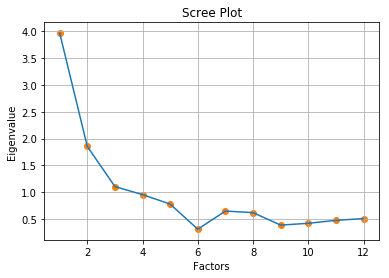

In [247]:
# First, let's create a scree plot of the values
plt.scatter(range(1,df.shape[1]+1),eig_val_cov)
plt.plot(range(1,df.shape[1]+1),eig_val_cov)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Step 2: PCA with varimax rotation and selected number of eigenvalues

In [313]:
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(df)
pca_df = pd.DataFrame(data = principalComponents2)
pca_df.head()

,0,1,2
0,-4.825671,2.200162,0.375441
1,-1.125121,0.404863,2.876555
2,-0.087310,0.284534,-1.833419
3,3.041781,-0.818393,-0.211907
4,0.612586,-1.028310,0.328913


In [314]:
print(pca2.explained_variance_)
print(pca2.explained_variance_ratio_)

[3.97061765 1.85452429 1.10660475]
[0.32962669 0.15395607 0.09186643]


In [315]:
pca_load = pd.DataFrame(abs(pca2.components_.T * np.sqrt(pca2.explained_variance_)))
pca_load['variable'] = df.columns
pca_load

,0,1,2,variable
0,0.621239,0.318013,0.174909,exciting
1,0.455907,0.053070,0.682680,calm
2,0.432953,0.203247,0.636964,independ
3,0.329246,0.698734,0.049450,sincere
4,0.391407,0.740131,0.190214,warm
5,0.606317,0.101688,0.191087,phy_attr
6,0.401484,0.655187,0.184124,kind
7,0.687785,0.181407,0.079082,intellig
8,0.786263,0.031345,0.045973,strong
9,0.742041,0.269101,0.041092,sophist


In [316]:
fact1_loads = pd.DataFrame(columns=['variable', 'loading'])
fact2_loads = pd.DataFrame(columns=['variable', 'loading'])
fact3_loads = pd.DataFrame(columns=['variable', 'loading'])
for i in range(len(pca_load)):
    if pca_load[0].iloc[i] > 0.50:
        fact1_loads = fact1_loads.append({'variable':df.columns[i], 'loading':pca_load[0].iloc[i]},
                                        ignore_index=True)
    if pca_load[1].iloc[i] > 0.50:
        fact2_loads = fact2_loads.append({'variable':df.columns[i], 'loading':pca_load[1].iloc[i]},
                                        ignore_index=True)
    if pca_load[2].iloc[i] > 0.50:
        fact3_loads = fact3_loads.append({'variable':df.columns[i], 'loading':pca_load[2].iloc[i]},
                                        ignore_index=True)

In [317]:
fact1_loads.sort_values(by='loading', ascending=False)

,variable,loading
3,strong,0.786263
4,sophist,0.742041
2,intellig,0.687785
5,happy,0.649239
0,exciting,0.621239
1,phy_attr,0.606317
6,sociable,0.579288


In [318]:
fact2_loads.sort_values(by='loading', ascending=False)

,variable,loading
1,warm,0.740131
0,sincere,0.698734
2,kind,0.655187


In [319]:
fact3_loads.sort_values(by='loading', ascending=False)

,variable,loading
0,calm,0.682680
1,independ,0.636964


In [320]:
pca_load = pd.DataFrame(abs(pca2.components_.T * np.sqrt(pca2.explained_variance_)))
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(pca_load)
chi_square_value, p_value
# Calculate MSA
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pca_load)

In [321]:
p_value

5.18303046945751e-05

In [322]:
kmo_model

0.2311805796339391

## C. PCA with n_components=2

In [323]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(df)
pca_df = pd.DataFrame(data = principalComponents2)
pca_df.head()

,0,1
0,-4.825671,2.200162
1,-1.125121,0.404863
2,-0.087310,0.284534
3,3.041781,-0.818393
4,0.612586,-1.028310


In [324]:
pca_load = pd.DataFrame(abs(pca2.components_.T * np.sqrt(pca2.explained_variance_)))
pca_load['variable'] = df.columns
pca_load

,0,1,variable
0,0.621239,0.318013,exciting
1,0.455907,0.053070,calm
2,0.432953,0.203247,independ
3,0.329246,0.698734,sincere
4,0.391407,0.740131,warm
5,0.606317,0.101688,phy_attr
6,0.401484,0.655187,kind
7,0.687785,0.181407,intellig
8,0.786263,0.031345,strong
9,0.742041,0.269101,sophist


In [325]:
fact1_loads = pd.DataFrame(columns=['variable', 'loading'])
fact2_loads = pd.DataFrame(columns=['variable', 'loading'])
for i in range(len(pca_load)):
    if pca_load[0].iloc[i] > 0.50:
        fact1_loads = fact1_loads.append({'variable':df.columns[i], 'loading':pca_load[0].iloc[i]},
                                        ignore_index=True)
    if pca_load[1].iloc[i] > 0.50:
        fact2_loads = fact2_loads.append({'variable':df.columns[i], 'loading':pca_load[1].iloc[i]},
                                        ignore_index=True)

In [326]:
fact1_loads.sort_values(by='loading', ascending=False)

,variable,loading
3,strong,0.786263
4,sophist,0.742041
2,intellig,0.687785
5,happy,0.649239
0,exciting,0.621239
1,phy_attr,0.606317
6,sociable,0.579288


In [327]:
fact2_loads.sort_values(by='loading', ascending=False)

,variable,loading
1,warm,0.740131
0,sincere,0.698734
2,kind,0.655187


### Test

In [328]:
pca_load = pd.DataFrame(abs(pca2.components_.T * np.sqrt(pca2.explained_variance_)))
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(pca_load)
chi_square_value, p_value
# Calculate MSA
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pca_load)

In [329]:
p_value

0.007682564485438371

In [330]:
kmo_model

0.49999999999999994

## D. PCA with Promax rotation

In [389]:
# Next look at the factor analysis with rotation
fa = FactorAnalyzer()
fa.analyze(df, rotation='promax', n_factors=2)

In [390]:
fa.loadings

,Factor1,Factor2
exciting,0.651222,-0.128316
calm,0.374092,0.036404
independ,0.250934,0.210953
sincere,-0.066205,0.644814
warm,-0.091671,0.841145
phy_attr,0.528271,0.041118
kind,0.005324,0.647405
intellig,0.660540,-0.013445
strong,0.700669,0.132885
sophist,0.793893,-0.102736


In [346]:
fact1_loads = pd.DataFrame(columns=['variable', 'loading'])
fact2_loads = pd.DataFrame(columns=['variable', 'loading'])
for i in range(len(fa2.loadings)):
    if fa2.loadings['Factor1'].iloc[i] > 0.28:
        fact1_loads = fact1_loads.append({'variable':df.columns[i], 'loading':fa2.loadings['Factor1'].iloc[i]},
                                        ignore_index=True)
    if fa2.loadings['Factor2'].iloc[i] > 0.28:
        fact2_loads = fact2_loads.append({'variable':df.columns[i], 'loading':fa2.loadings['Factor2'].iloc[i]},
                                        ignore_index=True)


In [347]:
fact1_loads.sort_values(by='loading', ascending=False)

,variable,loading
6,sophist,0.759534
5,strong,0.713184
4,intellig,0.645756
0,exciting,0.614599
8,sociable,0.584416
7,happy,0.550735
3,phy_attr,0.526388
1,calm,0.374155
2,independ,0.286721


In [348]:
fact2_loads.sort_values(by='loading', ascending=False)

,variable,loading
1,warm,0.808015
2,kind,0.636427
0,sincere,0.620195


In [349]:
fa2.get_factor_variance()

,Factor1,Factor2
SS Loadings,3.049609,1.666675
Proportion Var,0.254134,0.138890
Cumulative Var,0.254134,0.393024


In [350]:
ev, v = fa2.get_eigenvalues()
v

,Common_Factor_Eigenvalues
0,3.380933
1,1.335352
2,0.342040
3,0.276383
4,0.160628
5,0.043014
6,0.004027
7,-0.045842
8,-0.089483
9,-0.131607


In [351]:
new_cols = df.columns.drop('calm').drop('independ')
fa = FactorAnalyzer()
fa.analyze(df[[*new_cols]], rotation='varimax', n_factors=2)
fa.loadings

,Factor1,Factor2
exciting,0.625143,-0.009665
sincere,0.055029,0.590177
warm,0.075990,0.830244
phy_attr,0.540426,0.134345
kind,0.131985,0.649372
intellig,0.648543,0.119720
strong,0.701676,0.256807
sophist,0.750728,0.053804
happy,0.560707,0.211957
sociable,0.584053,-0.027149


In [352]:
fact1_loads = pd.DataFrame(columns=['variable', 'loading'])
fact2_loads = pd.DataFrame(columns=['variable', 'loading'])
for i in range(len(fa.loadings)):
    if fa.loadings['Factor1'].iloc[i] > 0.40:
        fact1_loads = fact1_loads.append({'variable':df.columns[i], 'loading':fa.loadings['Factor1'].iloc[i]},
                                        ignore_index=True)
    if fa.loadings['Factor2'].iloc[i] > 0.40:
        fact2_loads = fact2_loads.append({'variable':df.columns[i], 'loading':fa.loadings['Factor2'].iloc[i]},
                                        ignore_index=True)

In [353]:
fact1_loads.sort_values(by='loading', ascending=False)

,variable,loading
4,intellig,0.750728
3,kind,0.701676
2,phy_attr,0.648543
0,exciting,0.625143
6,sophist,0.584053
5,strong,0.560707
1,sincere,0.540426


In [354]:
fact2_loads.sort_values(by='loading', ascending=False)

,variable,loading
1,independ,0.830244
2,warm,0.649372
0,calm,0.590177


## E. Independent t-test comparisons
Obtain the two-factor varimax solution again, but this time output the factor scores. Then use an independent samples t test to make the following comparisons

E1. 

In [394]:
df = data.sample(n=270, random_state=123)
df.dtypes

crime         int64
pa_manip      int64
sex_def       int64
sex_subj      int64
sentence    float64
serious     float64
exciting      int64
calm          int64
independ      int64
sincere       int64
warm          int64
phy_attr      int64
kind          int64
intellig    float64
strong      float64
sophist     float64
happy       float64
sociable      int64
dtype: object

In [395]:
# Dropping missing values rows becuase missing data must be dropped for factor analysis
df.dropna(inplace=True)
df.head()

,crime,pa_manip,sex_def,sex_subj,sentence,serious,exciting,calm,independ,sincere,warm,phy_attr,kind,intellig,strong,sophist,happy,sociable
20,1,2,2,2,4.0,8.0,8,8,8,9,8,9,9,9.0,9.0,9.0,5.0,9
11,1,2,2,1,4.0,5.0,4,1,3,9,2,9,6,8.0,4.0,8.0,7.0,9
94,1,1,1,2,2.0,4.0,4,9,9,1,1,1,9,7.0,7.0,5.0,3.0,6
117,1,1,1,1,5.0,5.0,4,6,4,2,2,2,1,2.0,3.0,3.0,4.0,6
187,2,2,1,1,4.0,4.0,5,4,7,1,3,8,2,7.0,5.0,5.0,4.0,5


In [396]:
# Select the 12 metric variables defined in the directions
metric_vars = ['exciting', 'calm', 'independ', 'sincere', 'warm', 'phy_attr', 'kind', 'intellig','strong',
              'sophist', 'happy', 'sociable']

In [397]:
# Next look at the factor analysis with rotation
fa = FactorAnalyzer()
fa.analyze(df[[*metric_vars]], rotation='promax', n_factors=2)

In [398]:
fa.loadings

,Factor1,Factor2
exciting,0.651222,-0.128316
calm,0.374092,0.036404
independ,0.250934,0.210953
sincere,-0.066205,0.644814
warm,-0.091671,0.841145
phy_attr,0.528271,0.041118
kind,0.005324,0.647405
intellig,0.660540,-0.013445
strong,0.700669,0.132885
sophist,0.793893,-0.102736


In [403]:
phy_attr_ttests = pd.DataFrame(columns=['variable', 'statistic', 'pvalue', 'hypothesis'])
attr1 = df.loc[df['pa_manip'] == 1]
attr2 = df.loc[df['pa_manip'] == 2]
count = 0
alpha = 0.05
for i in metric_vars:
    t_value, p_value = stats.ttest_ind(attr1[i], attr2[i])

    if p_value > alpha:  # null hypothesis: x comes from a normal distribution
        hypothesis = "Fail to reject H0. There is no difference".format(i)
    else:
        hypothesis = "Reject H0. There is a difference".format(i)

    phy_attr_ttests = phy_attr_ttests.append({'variable':i, 'statistic': t_value, 'pvalue': p_value,
                                             'hypothesis':hypothesis},
                                             ignore_index=True)

        

In [404]:
phy_attr_ttests

,variable,statistic,pvalue,hypothesis
0,exciting,-8.667363,4.748347e-16,Reject H0. There is a difference
1,calm,-2.601464,9.812605e-03,Reject H0. There is a difference
2,independ,-3.447499,6.593686e-04,Reject H0. There is a difference
3,sincere,-1.521506,1.293434e-01,Fail to reject H0. There is no difference
4,warm,-1.685319,9.312225e-02,Fail to reject H0. There is no difference
5,phy_attr,-33.488256,1.796991e-96,Reject H0. There is a difference
6,kind,-1.389833,1.657639e-01,Fail to reject H0. There is no difference
7,intellig,-5.924164,9.873376e-09,Reject H0. There is a difference
8,strong,-7.526887,8.448977e-13,Reject H0. There is a difference
9,sophist,-7.586177,5.813934e-13,Reject H0. There is a difference


In [405]:
phy_attr_ttests = pd.DataFrame(columns=['variable', 'statistic', 'pvalue', 'hypothesis'])
attr1 = df.loc[df['crime'] == 1]
attr2 = df.loc[df['crime'] == 2]
count = 0
alpha = 0.05
for i in metric_vars:
    t_value, p_value = stats.ttest_ind(attr1[i], attr2[i])

    if p_value > alpha:  # null hypothesis: x comes from a normal distribution
        hypothesis = "Fail to reject H0. There is no difference".format(i)
    else:
        hypothesis = "Reject H0. There is a difference".format(i)

    phy_attr_ttests = phy_attr_ttests.append({'variable':i, 'statistic': t_value, 'pvalue': p_value,
                                             'hypothesis':hypothesis},
                                             ignore_index=True)

In [407]:
phy_attr_ttests

,variable,statistic,pvalue,hypothesis
0,exciting,2.628181,9.092860e-03,Reject H0. There is a difference
1,calm,1.115899,2.654915e-01,Fail to reject H0. There is no difference
2,independ,-1.174562,2.412405e-01,Fail to reject H0. There is no difference
3,sincere,-1.239519,2.162667e-01,Fail to reject H0. There is no difference
4,warm,-0.503063,6.153441e-01,Fail to reject H0. There is no difference
5,phy_attr,-0.198679,8.426688e-01,Fail to reject H0. There is no difference
6,kind,-1.079153,2.815156e-01,Fail to reject H0. There is no difference
7,intellig,6.872852,4.614315e-11,Reject H0. There is a difference
8,strong,2.176302,3.042954e-02,Reject H0. There is a difference
9,sophist,4.406357,1.536176e-05,Reject H0. There is a difference


In [408]:
sample = df.sample(n=135, random_state=123)

In [409]:
phy_attr_ttests = pd.DataFrame(columns=['variable', 'statistic', 'pvalue', 'hypothesis'])
attr1 = df.loc[df['pa_manip'] == 1]
attr2 = df.loc[df['pa_manip'] == 2]
count = 0
alpha = 0.05
for i in metric_vars:
    t_value, p_value = stats.ttest_ind(attr1[i], attr2[i])

    if p_value > alpha:  # null hypothesis: x comes from a normal distribution
        hypothesis = "Fail to reject H0. There is no difference".format(i)
    else:
        hypothesis = "Reject H0. There is a difference".format(i)

    phy_attr_ttests = phy_attr_ttests.append({'variable':i, 'statistic': t_value, 'pvalue': p_value,
                                             'hypothesis':hypothesis},
                                             ignore_index=True)

In [410]:
phy_attr_ttests

,variable,statistic,pvalue,hypothesis
0,exciting,-8.667363,4.748347e-16,Reject H0. There is a difference
1,calm,-2.601464,9.812605e-03,Reject H0. There is a difference
2,independ,-3.447499,6.593686e-04,Reject H0. There is a difference
3,sincere,-1.521506,1.293434e-01,Fail to reject H0. There is no difference
4,warm,-1.685319,9.312225e-02,Fail to reject H0. There is no difference
5,phy_attr,-33.488256,1.796991e-96,Reject H0. There is a difference
6,kind,-1.389833,1.657639e-01,Fail to reject H0. There is no difference
7,intellig,-5.924164,9.873376e-09,Reject H0. There is a difference
8,strong,-7.526887,8.448977e-13,Reject H0. There is a difference
9,sophist,-7.586177,5.813934e-13,Reject H0. There is a difference


In [411]:
phy_attr_ttests = pd.DataFrame(columns=['variable', 'statistic', 'pvalue', 'hypothesis'])
attr1 = df.loc[df['crime'] == 1]
attr2 = df.loc[df['crime'] == 2]
count = 0
alpha = 0.05
for i in metric_vars:
    t_value, p_value = stats.ttest_ind(attr1[i], attr2[i])

    if p_value > alpha:  # null hypothesis: x comes from a normal distribution
        hypothesis = "Fail to reject H0. There is no difference".format(i)
    else:
        hypothesis = "Reject H0. There is a difference".format(i)

    phy_attr_ttests = phy_attr_ttests.append({'variable':i, 'statistic': t_value, 'pvalue': p_value,
                                             'hypothesis':hypothesis},
                                             ignore_index=True)

In [412]:
phy_attr_ttests

,variable,statistic,pvalue,hypothesis
0,exciting,2.628181,9.092860e-03,Reject H0. There is a difference
1,calm,1.115899,2.654915e-01,Fail to reject H0. There is no difference
2,independ,-1.174562,2.412405e-01,Fail to reject H0. There is no difference
3,sincere,-1.239519,2.162667e-01,Fail to reject H0. There is no difference
4,warm,-0.503063,6.153441e-01,Fail to reject H0. There is no difference
5,phy_attr,-0.198679,8.426688e-01,Fail to reject H0. There is no difference
6,kind,-1.079153,2.815156e-01,Fail to reject H0. There is no difference
7,intellig,6.872852,4.614315e-11,Reject H0. There is a difference
8,strong,2.176302,3.042954e-02,Reject H0. There is a difference
9,sophist,4.406357,1.536176e-05,Reject H0. There is a difference
